In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from mpl_toolkits.basemap import Basemap
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [2]:
data = []
with open(r"C:\Users\Atharva Kulkarni\Desktop\WPI_Courses\Semester-2\NLP\Final_project\archive (2)\yelp_academic_dataset_business.json", 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [21]:
df["hours"][1]

{'Monday': '0:0-0:0',
 'Tuesday': '8:0-18:30',
 'Wednesday': '8:0-18:30',
 'Thursday': '8:0-18:30',
 'Friday': '8:0-18:30',
 'Saturday': '8:0-14:0'}

In [5]:
df.shape

(150346, 14)

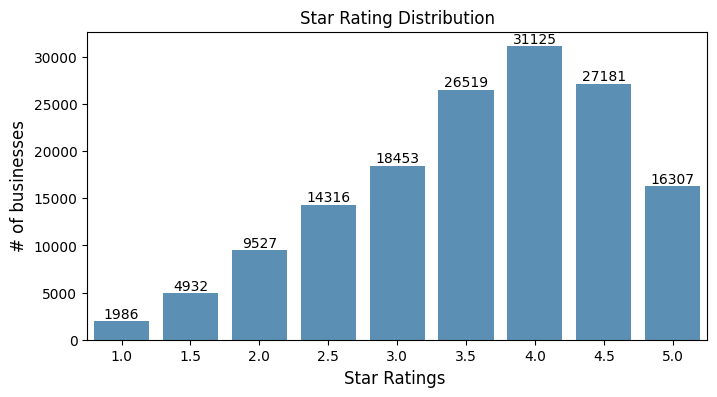

In [6]:
x=df['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

There are  83160  different types/categories of Businesses in Yelp!


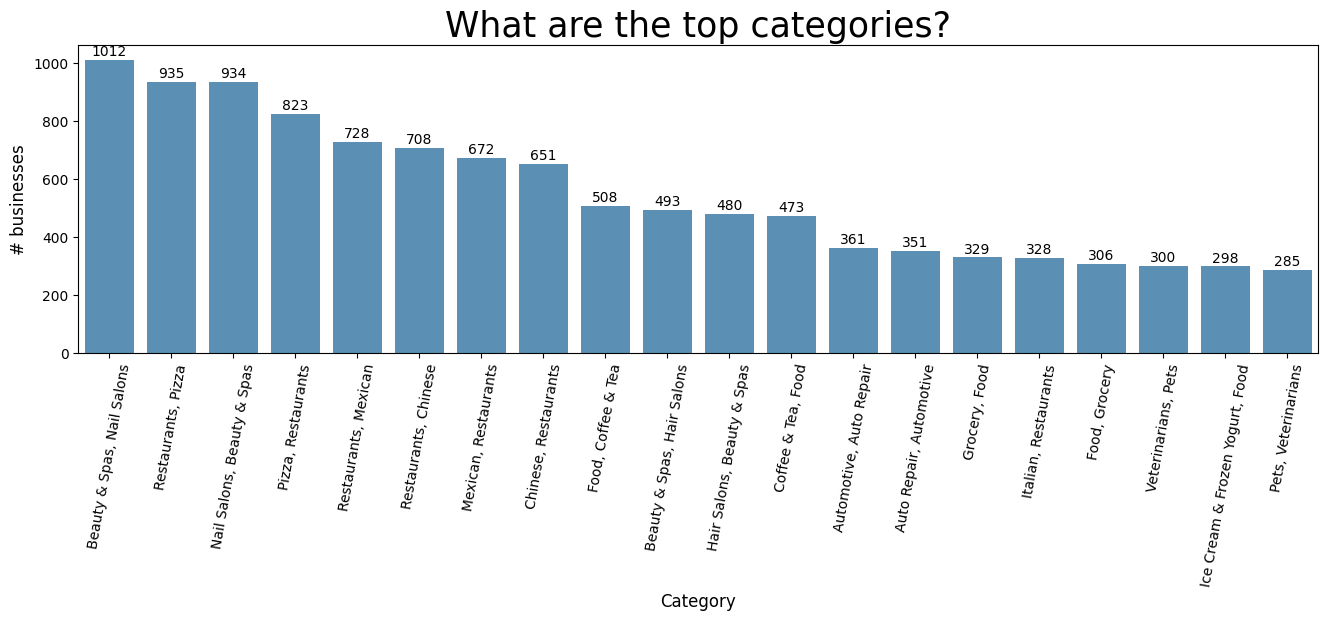

In [7]:
categories = df['categories'].dropna()

cats = categories.str.split(';', expand=True).stack().to_frame(name='category')
x = cats['category'].value_counts()
print("There are ",len(x)," different types/categories of Businesses in Yelp!")
#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [10]:
color = sns.color_palette()

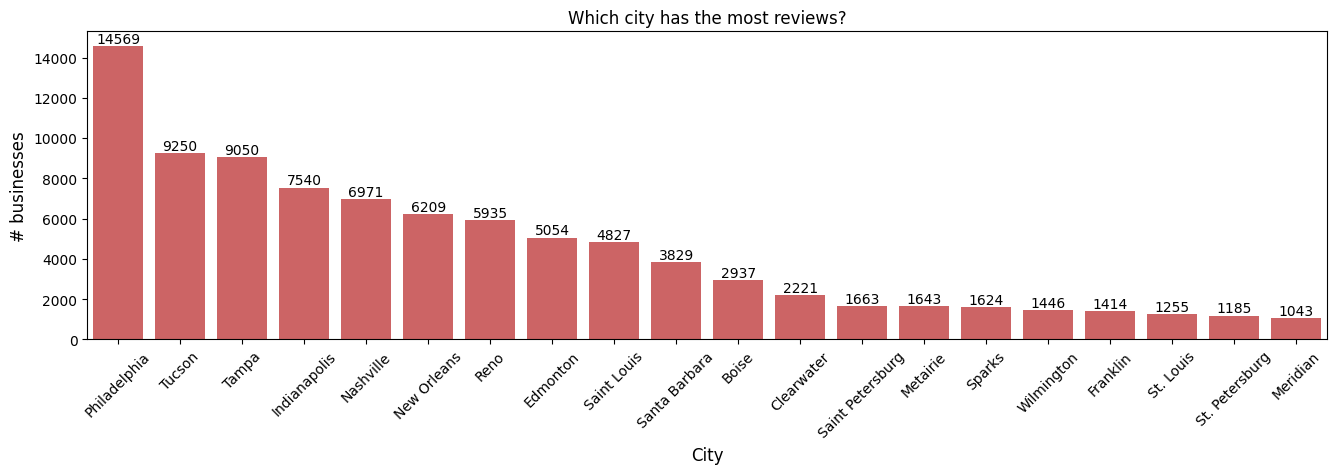

In [11]:
#Get the distribution of the ratings
x=df['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,color=color[3])
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [15]:
m = folium.Map(location=[40.479627, -99.396414], tiles='cartodbpositron', zoom_start=4)

mc = MarkerCluster()
for idx, row in df.sample(10000).iterrows():
    mc.add_child(Marker([row['latitude'], row['longitude']]))
m.add_child(mc)
print("Map with 10k samples:")
m

Map with 10k samples:


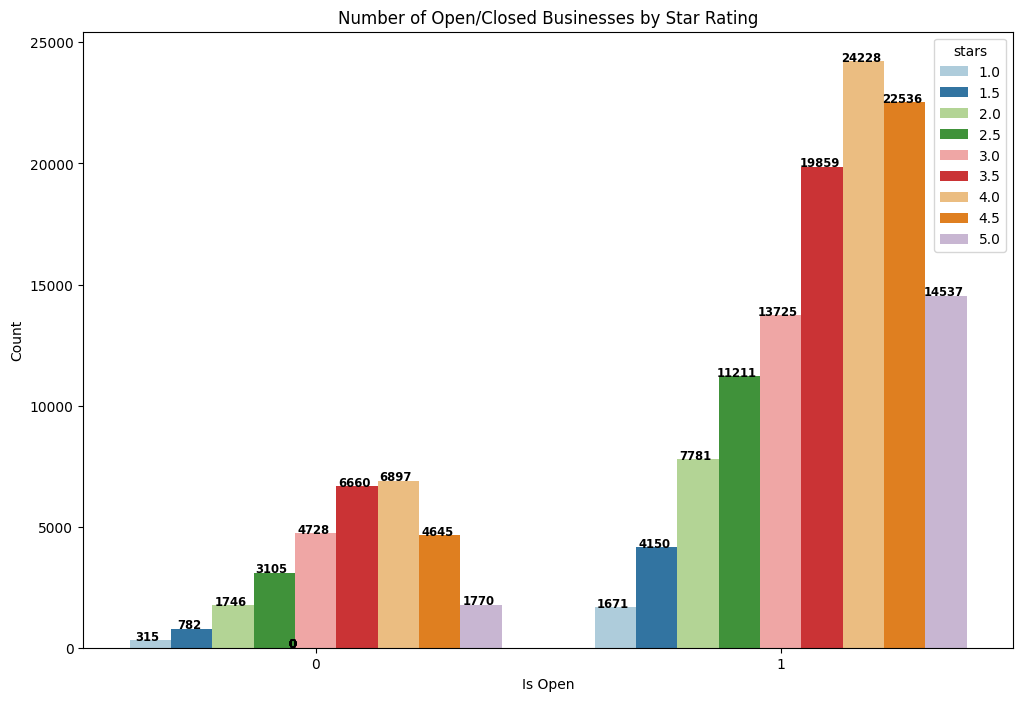

In [17]:
plt.figure(figsize=(12,8))
ax = sns.countplot(hue='stars', x='is_open'  , data = df, palette='Paired')
ax.set_ylabel('Count')
ax.set_xlabel('Is Open')
ax.set_title('Number of Open/Closed Businesses by Star Rating')
num_open , num_closed = df['is_open'].value_counts()
for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width-.05,y+height,'{:.0f}'.format(height),weight='bold',horizontalalignment='center', size='small')                 
plt.show()

In [24]:
df_hours = df['hours']

def parse_hours(hours_str):
    if hours_str == 'Closed':
        return np.nan, np.nan
    else:
        open_time, close_time = hours_str.split('-')
        open_hour, open_minute = map(int, open_time.split(':'))
        close_hour, close_minute = map(int, close_time.split(':'))
        return open_hour + open_minute / 60, close_hour + close_minute / 60
    
def calculate_total_reviews(opening_hours, closing_hours):
    if opening_hours is None:
        return np.nan
    total_reviews = 0
    for day, hours in opening_hours.items():
        if hours == 'Closed':
            continue
        open_hour, close_hour = parse_hours(hours)
        total_reviews += (close_hour - open_hour)
    return total_reviews